In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [3]:
Loan_Approval_Data = pd.read_csv("/content/Loan_Approval.csv")

# Removing categorical variables
Loan_Approval_Data = Loan_Approval_Data[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']]

In [7]:
X = Loan_Approval_Data.drop('loan_status', axis = 1)
Y = Loan_Approval_Data['loan_status']
Y = Y.dropna()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 9)

Model = LogisticRegression(max_iter = 1000)
Model.fit(X_train, Y_train)

Y_pred = Model.predict(X_test)
print(Y_pred)

[1 0 0 ... 0 0 0]


In [8]:
Accuracy = accuracy_score(Y_test, Y_pred)
Precision = precision_score(Y_test, Y_pred)
Recall = recall_score(Y_test, Y_pred)
CM = confusion_matrix(Y_test, Y_pred)

print(f'Accuracy: {Accuracy}')
print(f'Precision: {Precision}')
print(f'Recall: {Recall}')
print(f'Confusion Matrix: \n{CM}')

# With an Accuracy of ~83% and the number of True Positives at ~74%, we can say that the model is somewhat trained but nowhere near implementation standards.
# Now that we have created the model, we will run a classification report, create an ROC Curve and calculate the AUC

Accuracy: 0.8276666666666667
Precision: 0.6894689468946895
Recall: 0.38843813387423937
Confusion Matrix: 
[[6683  345]
 [1206  766]]


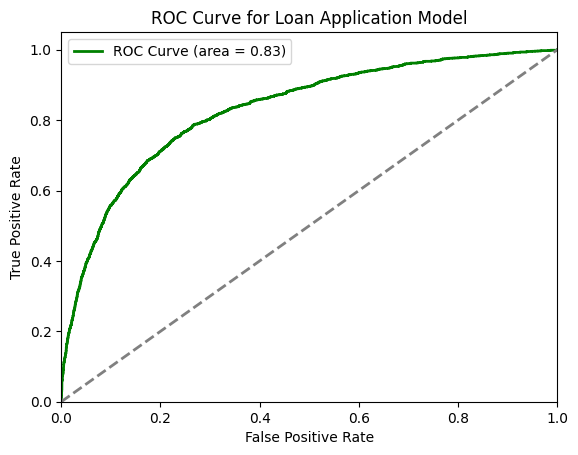

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


Y_pred_prob = Model.predict_proba(X_test)[:, 1]

#We use the roc_curve function to calculatre the False Positive Rate (FPR) and True Positive Rate (TPR)
#The TPR is separate from the number of true positives because we have to account for false negatives as well to obtain the true rate.

fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color = 'green', lw = 2, label = 'ROC Curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0,1], [0,1], color = 'gray', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Application Model')
plt.legend(loc = "upper left")
#plt.savefig('ROC_Curve.png')
#GitHub CodeSpaces does not allow the plot to be shown, so I had to save it to a png for viewing purposes
#In the ROC Curve plot, we can see that the Area Under Curve (AUC) is .83, meaning that the model performs decently well
plt.show()